# Analyzing Zipline backtest and Pyfolio metrics

We implement a basic strategy going long for AAPL with an initial capital of 1000USD.

We do this in order to analyze the results of Zipline backtest and the metrics provided by the Pyfolio tear sheet.

/opt/anaconda3/envs/env_zipline/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


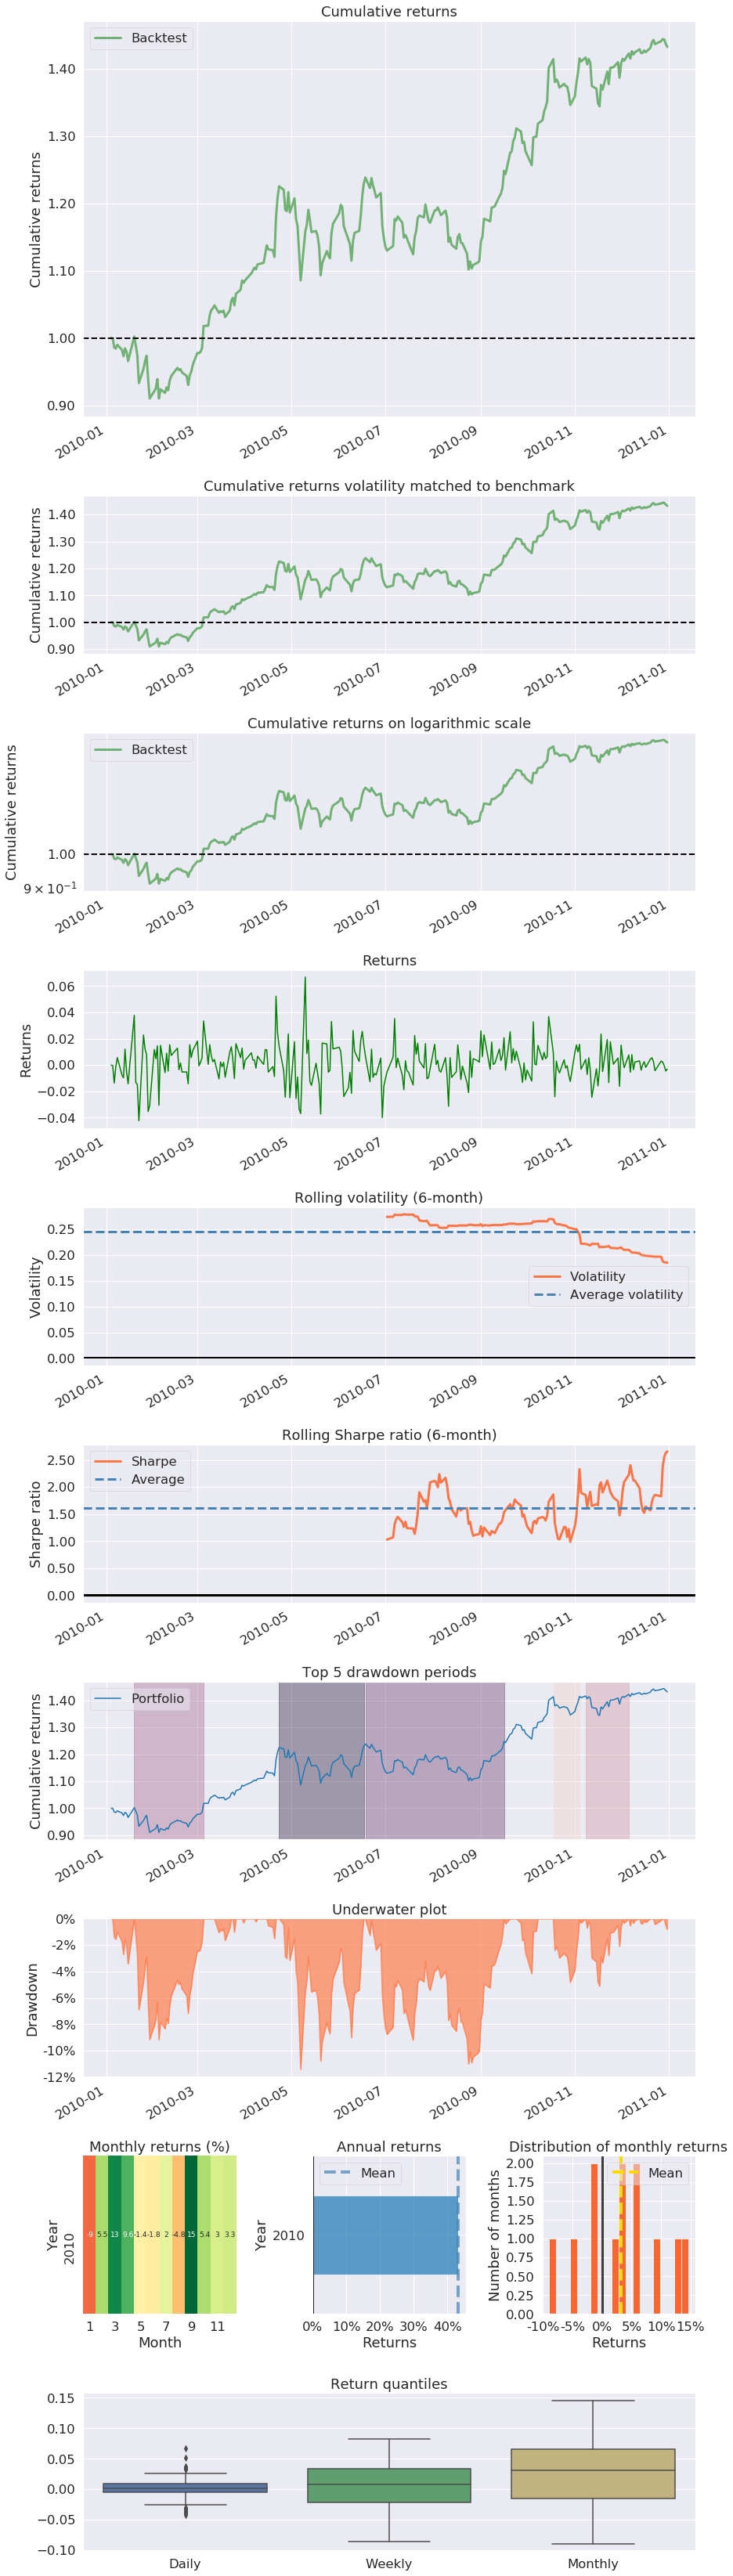

In [85]:
######################################################## Importing necessary libraries
%matplotlib inline
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import pyfolio as pf

######################################################## Defining zipline basic functions
def initialize(context):
    
    # Stock to trade
    context.stock = symbol('AAPL')
    
    # Moving average window
    context.index_average_window = 100
    
def handle_data(context, data):
    
    # Request history for the stock
    equities_hist = data.history(context.stock, "close", context.index_average_window, "1d")
    
    '''
    # Check if price is above moving average
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0
    '''
    
    # Always long on AAPL
    stock_weight = 1.0    
    
    # Trading
    order_target_percent(context.stock, stock_weight)


def analyze(context, perf):
    # Use PyFolio to generate a performance report
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    pf.create_returns_tear_sheet(returns, benchmark_rets=None)

######################################################## Running Backtest
start_date = datetime(2010, 1, 1, tzinfo=pytz.UTC)
end_date = datetime(2010, 12, 31, tzinfo=pytz.UTC)

# Fire off the backtest
results = run_algorithm(
    start=start_date,
    end=end_date,
    initialize=initialize,
    analyze=analyze,
    handle_data=handle_data,
    capital_base=1000,
    data_frequency = 'daily', bundle='quandl'
)

-------------------------------

# Analyzing zipline results : run_algorithm()

We apply the run_algorithm function to let zipline run the backtest. The results are kept in the variable __results__.

### Printing first rows of results dataframe

The variable the function __run_algorithm__ returns a dataframe, which we store in the variable __results__

In [3]:
results.head()

algo_volatility  algorithm_period_return alpha  \
2010-01-04 00:00:00+00:00              NaN                 0.000000  None   
2010-01-05 00:00:00+00:00         0.004858                -0.000433  None   
2010-01-06 00:00:00+00:00         0.123132                -0.014073  None   
2010-01-07 00:00:00+00:00         0.103524                -0.015633  None   
2010-01-08 00:00:00+00:00         0.112636                -0.010033  None   

                           benchmark_period_return  benchmark_volatility  \
2010-01-04 00:00:00+00:00                      0.0                   NaN   
2010-01-05 00:00:00+00:00                      0.0                   0.0   
2010-01-06 00:00:00+00:00                      0.0                   0.0   
2010-01-07 00:00:00+00:00                      0.0                   0.0   
2010-01-08 00:00:00+00:00                      0.0                   0.0   

                           beta  capital_used  ending_cash  ending_exposure  \
2010-01-04 00:00:00+00:00  None       0.00000   1000.00000             0.00   
2010-01-05 00:00:00+00:00  None    -857.95276    142.04724           857.52   
2010-01-06 00:00:00+00:00  None       0.00000    142.04724           843.88   
2010-01-07 00:00:00+00:00  None       0.00000    142.04724           842.32   
2010-01-08 00:00:00+00:00  None       0.00000    142.04724           847.92   

                           ending_value          ...            \
2010-01-04 00:00:00+00:00          0.00          ...             
2010-01-05 00:00:00+00:00        857.52          ...             
2010-01-06 00:00:00+00:00        843.88          ...             
2010-01-07 00:00:00+00:00        842.32          ...             
2010-01-08 00:00:00+00:00        847.92          ...             

                           short_exposure  short_value  shorts_count  \
2010-01-04 00:00:00+00:00             0.0          0.0             0   
2010-01-05 00:00:00+00:00             0.0          0.0             0   
2010-01-06 00:00:00+00:00             0.0          0.0             0   
2010-01-07 00:00:00+00:00             0.0          0.0             0   
2010-01-08 00:00:00+00:00             0.0          0.0             0   

                             sortino  starting_cash  starting_exposure  \
2010-01-04 00:00:00+00:00        NaN     1000.00000               0.00   
2010-01-05 00:00:00+00:00 -11.224972     1000.00000               0.00   
2010-01-06 00:00:00+00:00  -9.451059      142.04724             857.52   
2010-01-07 00:00:00+00:00  -9.044199      142.04724             843.88   
2010-01-08 00:00:00+00:00  -5.150859      142.04724             842.32   

                           starting_value  trading_days  \
2010-01-04 00:00:00+00:00            0.00             1   
2010-01-05 00:00:00+00:00            0.00             2   
2010-01-06 00:00:00+00:00          857.52             3   
2010-01-07 00:00:00+00:00          843.88             4   
2010-01-08 00:00:00+00:00          842.32             5   

                                                                transactions  \
2010-01-04 00:00:00+00:00                                                 []   
2010-01-05 00:00:00+00:00  [{'dt': 2010-01-05 21:00:00+00:00, 'amount': 4...   
2010-01-06 00:00:00+00:00                                                 []   
2010-01-07 00:00:00+00:00                                                 []   
2010-01-08 00:00:00+00:00                                                 []   

                          treasury_period_return  
2010-01-04 00:00:00+00:00                    0.0  
2010-01-05 00:00:00+00:00                    0.0  
2010-01-06 00:00:00+00:00                    0.0  
2010-01-07 00:00:00+00:00                    0.0  
2010-01-08 00:00:00+00:00                    0.0  

[5 rows x 37 columns]

### Printing columns of results dataframe

Here we see all the columns contained in the __results__ dataframe.

In [4]:
for column in results.columns:
    print(column)

algo_volatility
algorithm_period_return
alpha
benchmark_period_return
benchmark_volatility
beta
capital_used
ending_cash
ending_exposure
ending_value
excess_return
gross_leverage
long_exposure
long_value
longs_count
max_drawdown
max_leverage
net_leverage
orders
period_close
period_label
period_open
pnl
portfolio_value
positions
returns
sharpe
short_exposure
short_value
shorts_count
sortino
starting_cash
starting_exposure
starting_value
trading_days
transactions
treasury_period_return


### Printing first row of results dataframe

On the first period we only hold 1000USD in cash, which is stored on the __starting_cash__ and __ending_cash__ variables. We start trading on the next period.

In [8]:
row_0 = results.iloc[0]
print(row_0)

algo_volatility                                                          NaN
algorithm_period_return                                                    0
alpha                                                                   None
benchmark_period_return                                                    0
benchmark_volatility                                                     NaN
beta                                                                    None
capital_used                                                               0
ending_cash                                                             1000
ending_exposure                                                            0
ending_value                                                               0
excess_return                                                              0
gross_leverage                                                             0
long_exposure                                                              0

The column __orders__ contains a dictionary with information about the orders we submitted. The dictionary is printed below. The variable __amount__ = 4. This means we submitted an order to by 4 units of AAPL, but it has not been fulfilled yet.

In [13]:
row_0.orders

[{'amount': 4,
  'commission': 0,
  'created': Timestamp('2010-01-04 21:00:00+0000', tz='UTC'),
  'dt': Timestamp('2010-01-04 21:00:00+0000', tz='UTC'),
  'filled': 0,
  'id': '7102d60a18df48838e2a439138247ab8',
  'limit': None,
  'limit_reached': False,
  'reason': None,
  'sid': Equity(8 [AAPL]),
  'status': 0,
  'stop': None,
  'stop_reached': False}]

### Printing second row of results dataframe

Below we print the second row of the results of the __run_algorithm__ function. At this point our order has already been fulfilled. We see that we only bought 4 AAPL units, as indicated in the __transactions__ dictionary. However, the actual price at which we bought the stock is stored in the __positions__ dictionary as the __cost_basis__.

In [61]:
row_1 = results.iloc[1]
print(row_1)

algo_volatility                                                   0.00485772
algorithm_period_return                                          -0.00043276
alpha                                                                   None
benchmark_period_return                                                    0
benchmark_volatility                                                       0
beta                                                                    None
capital_used                                                        -857.953
ending_cash                                                          142.047
ending_exposure                                                       857.52
ending_value                                                          857.52
excess_return                                                              0
gross_leverage                                                      0.857891
long_exposure                                                         857.52

In [19]:
transactions = row_1.transactions[0]
transactions

{'amount': 4,
 'commission': None,
 'dt': Timestamp('2010-01-05 21:00:00+0000', tz='UTC'),
 'order_id': '7102d60a18df48838e2a439138247ab8',
 'price': 214.48719,
 'sid': Equity(8 [AAPL])}

In [26]:
positions = row_1.positions[0]
positions

{'amount': 4,
 'cost_basis': 214.48819,
 'last_sale_price': 214.38,
 'sid': Equity(8 [AAPL])}

Below we compute the remaining cash (remember we started with 1000USD). This quantity matches the __ending_cash__ variable above.

In [34]:
starting_cash = row_1['starting_cash']
ending_cash = starting_cash - positions['amount']*positions['cost_basis']
ending_cash

142.04724

We now compute the rate of return of this period, using the __last_sale_price__ variable stored at __positions__. The value of __ROR__ we compute concides with the variable __algorithm_return_period__.

In [36]:
long_exposure = positions['amount']*positions['last_sale_price']
starting_portfolio = starting_cash
ending_portfolio = long_exposure + ending_cash

ROR = (ending_portfolio - starting_portfolio)/starting_portfolio
ROR

-0.0004327600000000302

As we can see in the plit below, the __algorithm_return_period__ variable actually stores the cumulative ROR.

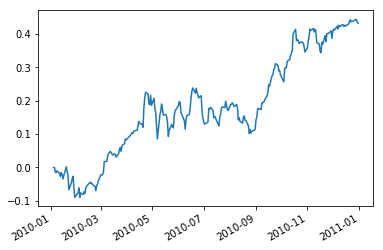

In [92]:
ax = results.algorithm_period_return.plot()

Below we see the ROR per day.

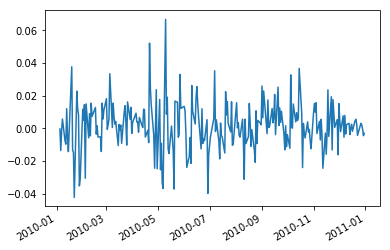

In [94]:
ROR_daily = results.portfolio_value.pct_change()
ax = ROR_daily.plot()

In [99]:
print('Mean daily ROR = {0:.2%}'.format(ROR_daily.mean()))
print('Volatility daily ROR = {0:.2%}'.format(ROR_daily.std()))

Mean daily ROR = 0.15%
Volatility daily ROR = 1.47%


### Pending

We are still due to find out where the following values come from:

    · algo_volatility
    · sharpe
    · sortino

----------

# Analyzing Pyfolio tear sheet

We will now proceed to analyze the tear sheet generated by Pyfolio. We have already printed it above with the __analyze__ function, but now we are going to change the time span to include two years of daily data on AAPL.

/opt/anaconda3/envs/env_zipline/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


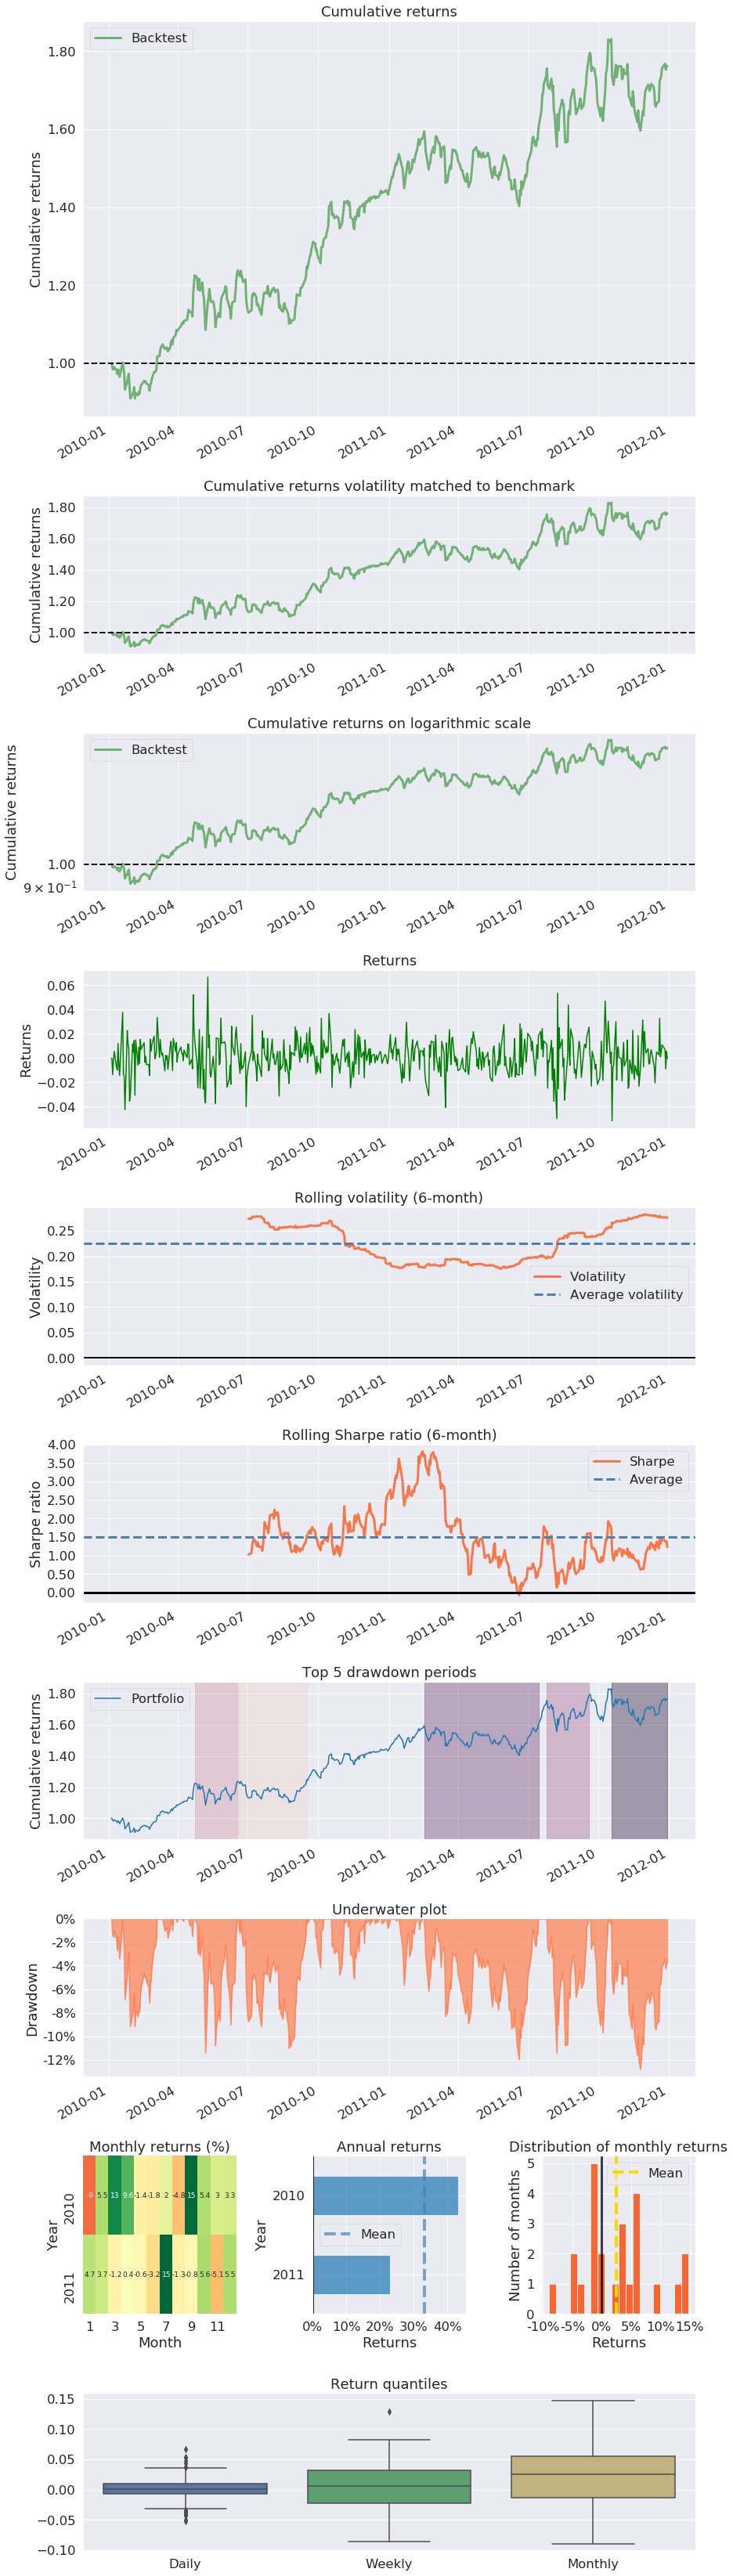

In [174]:
######################################################## Running Backtest
start_date = datetime(2010, 1, 1, tzinfo=pytz.UTC)
end_date = datetime(2011, 12, 31, tzinfo=pytz.UTC)

# Fire off the backtest
results = run_algorithm(
    start=start_date,
    end=end_date,
    initialize=initialize,
    analyze=analyze,
    handle_data=handle_data,
    capital_base=1000,
    data_frequency = 'daily', 
    bundle='quandl'
)

We will first analyze the first table returned by the Pyfolio tear sheet.

### Annualized and cumulative returns

The first and second values are the annual return and the cumulative return. Cumulative return is simply calculated as the total ROR between the last and first value. Recall we started with 1000USD on AAPL.

In [109]:
# Computing cumulative ROR
starting_portfolio = results.iloc[0].portfolio_value
ending_portfolio = results.iloc[-1].portfolio_value
cumulative_ROR = (ending_portfolio - starting_portfolio)/starting_portfolio
print('Cumulative ROR = {0:.2%}'.format(cumulative_ROR))

# Computing annual ROR
trading_days_per_year = 252
trading_days_strategy = results.iloc[-1].trading_days
total_years_strategy = trading_days_strategy/trading_days_per_year
annual_ROR = pow(1 + cumulative_ROR, 1/total_years_strategy) - 1
print('Annual ROR = {0:.2%}'.format(annual_ROR))

Cumulative ROR = 76.20%
Annual ROR = 32.74%


### Annualized volatility
Annual volatility is actually the annualized volatility of daily ROR. For this we compute the standard deviation of the daily ROR's and multiply by $\sqrt(252)$

In [114]:
stdev_ROR = results.portfolio_value.pct_change().std()
annual_vol = stdev_ROR*pow(trading_days_per_year, 0.5)
print('Annualized Volatility = {0:.2%}'.format(annual_vol))

Annualized Volatility = 23.64%


### Sharpe ratio
With an annual risk-free ROR of 1.5% for the period between 01-01-2010 and 31-12-2011 we obtian the indicated Sharpe ratio.

In [124]:
riskfree_ROR = 0.015
sharpe = (annual_ROR - riskfree_ROR) / annual_vol
print('Sharpe Ratio = {0:.3}'.format(sharpe))

Sharpe Ratio = 1.32


### Calmar ratio
The Calmar ratio is computed as the ratio of the annual return and the maximum drawdown of a given period.

In [129]:
max_drawdown = abs(results.iloc[-1].max_drawdown)
calmar = annual_ROR / max_drawdown
print('Calmar Ratio = {0:.3}'.format(calmar))

Calmar Ratio = 2.55


### Omega ratio

The Omega ratio is the ratio of the cumulative probability of having a gain over a fixed benchmark to the cumulative probability of losing against the same benchmark.

"Omega ratio is a weighted risk-return ratio for a given level of expected return that helps us to identify the chances of winning in comparison to loosing (higher the better). It also considers the third and fourth momentum effect i.e. skewness & kurtosis which gives this an immense usefulness in comparison to others."

Source : https://www.wallstreetmojo.com/omega-ratio/

In [143]:
daily_ROR = results.portfolio_value.pct_change()
benchmark = 0.0
excess_ROR = daily_ROR - benchmark

win = excess_ROR[excess_ROR >= 0].sum()
lose = -excess_ROR[excess_ROR < 0].sum()

omega = win/lose
print('Omega Ratio = {0:.3}'.format(omega))

Omega Ratio = 1.25


### Sortino ratio

### Skew
Skewness is teh third momentum : 

$s = \sum_{i=1}^n \left( \frac{X_i - \mu}{\sigma} \right)^3 \frac{1}{N}$


https://en.wikipedia.org/wiki/Skewness

In [265]:
daily_ROR = results.portfolio_value.pct_change()
skew = daily_ROR.skew()
print('Skew = {0:.2}'.format(skew))

Skew = 0.065


### Kurtosis

Kurtosis is the fourth momentum:
https://en.wikipedia.org/wiki/Kurtosis

In [268]:
daily_ROR = results.portfolio_value.pct_change()
kurt = daily_ROR.kurt()
print('Kurt = {0:.3}'.format(kurt))

Kurt = 1.63
